In [1]:
pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=2a39004c2ff0edcfd8893fb116c21f786ba7781628c60b354f49ccb5fe885808
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


INSTALLING FUZZY-LOGIC MODULE

In [2]:
pip install control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.1/455.1 kB 3.4 MB/s eta 0:00:00


INSTALLNG CONTROL MODULE UNDER SCIKIT-FUZZY

In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


In [4]:
manufacturer = ctrl.Antecedent(np.arange(0,21,1), 'manufacturer')
supplier = ctrl.Antecedent(np.arange(0,21,1), 'supplier')




In [5]:
result = ctrl.Consequent(np.arange(0,101,1), 'result')


In [6]:
manufacturer.automf(3)

In [7]:
supplier.automf(3)

In [8]:
result['low'] = fuzz.trimf(result.universe, [0,0,13])
result['medium'] = fuzz.trimf(result.universe, [0,13,25])
result['high'] = fuzz.trimf(result.universe, [13,25,25])



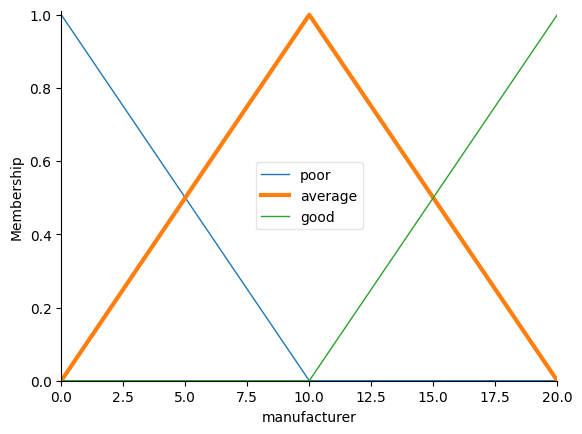

In [9]:
manufacturer['average'].view()

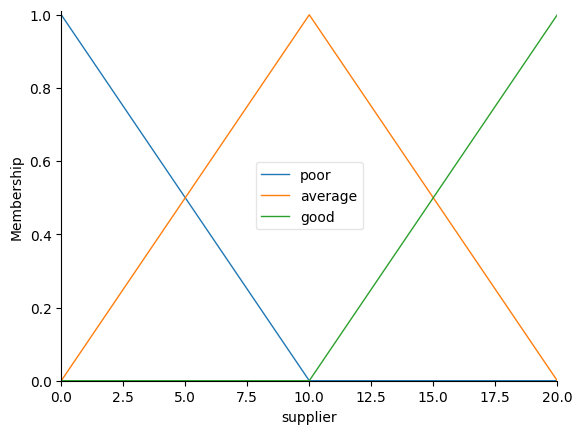

In [10]:
supplier.view()

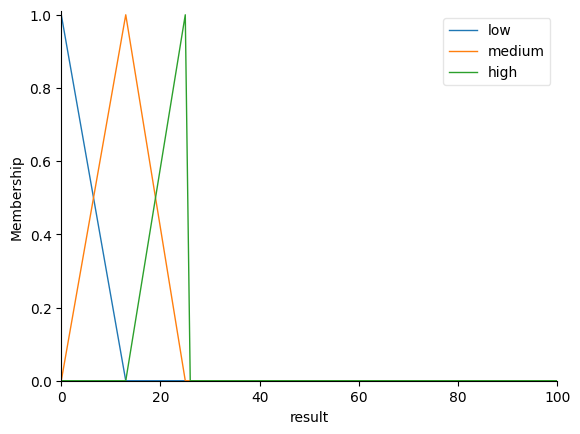

In [11]:
result.view()

In [12]:
rule1 = ctrl.Rule(manufacturer['poor'] & supplier['poor'], result['low'])
rule2 = ctrl.Rule(manufacturer['good'] & supplier['good'], result['high'])





In [13]:
resulting_ctrl = ctrl.ControlSystem([rule1, rule2])
resulting  = ctrl.ControlSystemSimulation(resulting_ctrl)

In [14]:
resulting.input['manufacturer'] = 15.7
resulting.input['supplier'] = 18.1


In [15]:
resulting.compute()


In [16]:
print(resulting.output['result'])

20.859230769230766


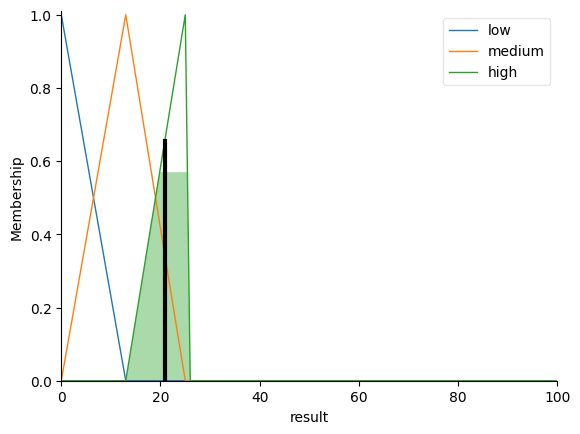

In [17]:
result.view(sim=resulting)